### `Feature Selection - Pearson Correlation`

- Here we will remove features with the basis of correlations.
- Always remember if the correlation between an independent feature and the dependent feature is high then that feature is very important, so donot remove it.
- But if the correlation between the independent features itself is high `(>90%)` then we can keep any one of them.

In [3]:
# importing the libraries

import pandas as pd

from sklearn.datasets import load_boston

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [4]:
# importing the dataset

data = load_boston()
df = pd.DataFrame(data.data, columns = data.feature_names)
df["MEDV"] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# Creating independent and dependent features

X = df.drop("MEDV",axis=1)   
y = df["MEDV"] 

X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

In [7]:
# Checking the correlation

X_train.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.196172,0.382073,-0.049364,0.416560,-0.188280,0.329927,-0.355840,0.603880,0.560570,0.264780,-0.299525,0.439369
ZN,-0.196172,1.000000,-0.529392,-0.063863,-0.523572,0.319260,-0.583885,0.658331,-0.314833,-0.327834,-0.392838,0.164641,-0.429178
INDUS,0.382073,-0.529392,1.000000,0.044224,0.750218,-0.392969,0.629257,-0.686848,0.578459,0.719038,0.388353,-0.331638,0.603374
CHAS,-0.049364,-0.063863,0.044224,1.000000,0.043748,0.088125,0.067269,-0.085492,0.022338,-0.017156,-0.072683,0.069682,-0.059060
NOX,0.416560,-0.523572,0.750218,0.043748,1.000000,-0.279202,0.740052,-0.765753,0.627188,0.683445,0.179046,-0.369445,0.577154
RM,-0.188280,0.319260,-0.392969,0.088125,-0.279202,1.000000,-0.235839,0.183857,-0.179242,-0.275242,-0.385526,0.157459,-0.623920
AGE,0.329927,-0.583885,0.629257,0.067269,0.740052,-0.235839,1.000000,-0.761543,0.440578,0.502429,0.239729,-0.250416,0.606530
DIS,-0.355840,0.658331,-0.686848,-0.085492,-0.765753,0.183857,-0.761543,1.000000,-0.467653,-0.519643,-0.176620,0.248376,-0.501780
RAD,0.603880,-0.314833,0.578459,0.022338,0.627188,-0.179242,0.440578,-0.467653,1.000000,0.907455,0.437687,-0.415325,0.442783
TAX,0.560570,-0.327834,0.719038,-0.017156,0.683445,-0.275242,0.502429,-0.519643,0.907455,1.000000,0.447518,-0.412145,0.515905


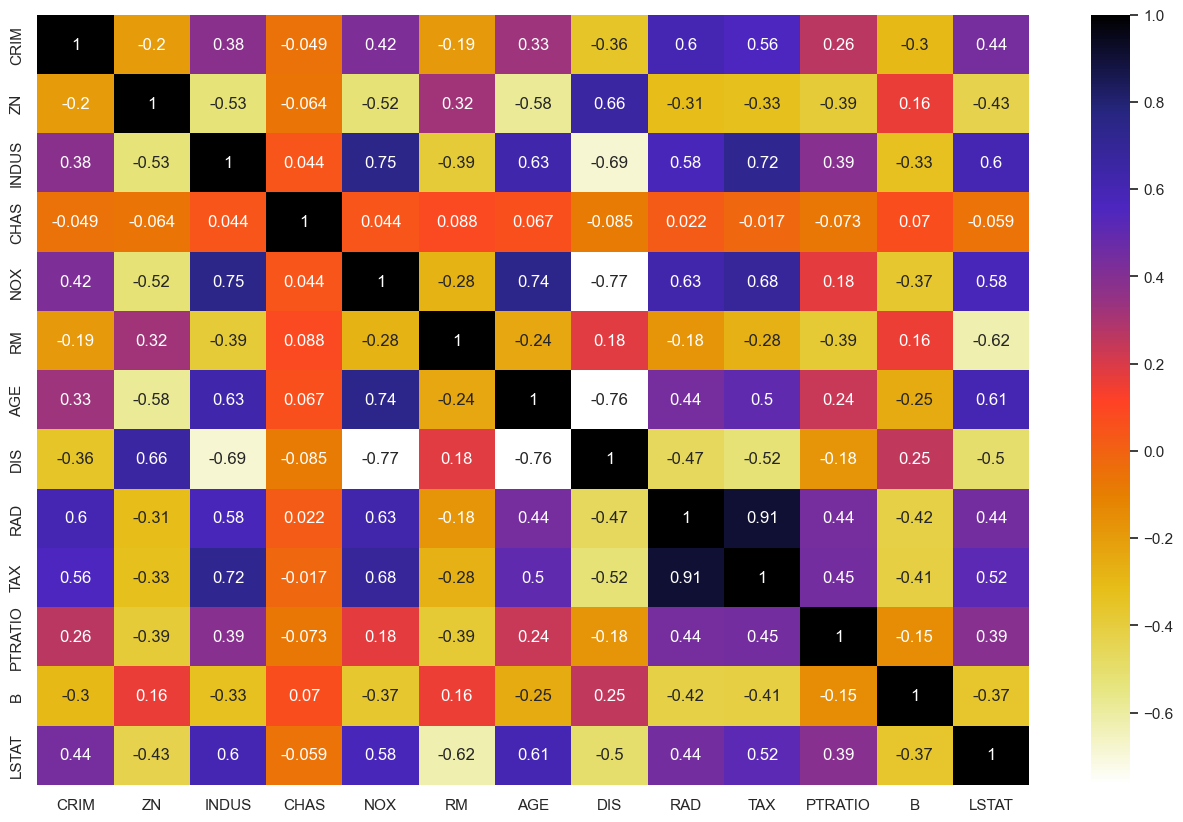

In [8]:
# Visualize using Pearson Correlation


plt.figure(figsize=(16,10))
cor = X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [9]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
# Here negative correlation gets handeled with the abs()

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [10]:
# Here we are setting the threshold as 70%
# So any features with more than 70% correlated will be treated as one
# Remember the correlation to be only find from train data and not from test data to overcome the issue of Overfitting

corr_features = correlation(X_train, 0.7)

print(f"The number of most correlated features is {len(set(corr_features))} and their names are:\n {corr_features}")

The number of most correlated features is 4 and their names are:
 {'NOX', 'TAX', 'DIS', 'AGE'}


In [11]:
# Now dropping the correlated features from the train and test dataset

X_train_trf = X_train.drop(corr_features, axis=1)
X_test_trf = X_test.drop(corr_features, axis=1)

X_train_trf

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,5.019,4.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,6.538,3.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,6.335,4.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,6.345,5.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,5.961,2.0,19.1,378.09,17.93
...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,5.708,5.0,19.6,391.13,11.74
192,0.08664,45.0,3.44,0.0,7.178,5.0,15.2,390.49,2.87
117,0.15098,0.0,10.01,0.0,6.021,6.0,17.8,394.51,10.30
47,0.22927,0.0,6.91,0.0,6.030,3.0,17.9,392.74,18.80


In [12]:
# Checking the original dataset's shape with the transformed part

X_train.shape, X_train_trf.shape

((354, 13), (354, 9))

**Notes:**
- Now we have `9` columns instead of `13` as previous.

**Now working with big dataset**

In [13]:
df=pd.read_csv('https://raw.githubusercontent.com/poindextrose/Kaggle-Santander-Customer-Satisfaction/master/train.csv',
               nrows=10000)
df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [14]:
# Creating Independent and Dependent variables

X=df.drop(labels=['TARGET'], axis=1)
y=df['TARGET']

X.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [15]:
# Doing train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((7000, 370), (3000, 370))

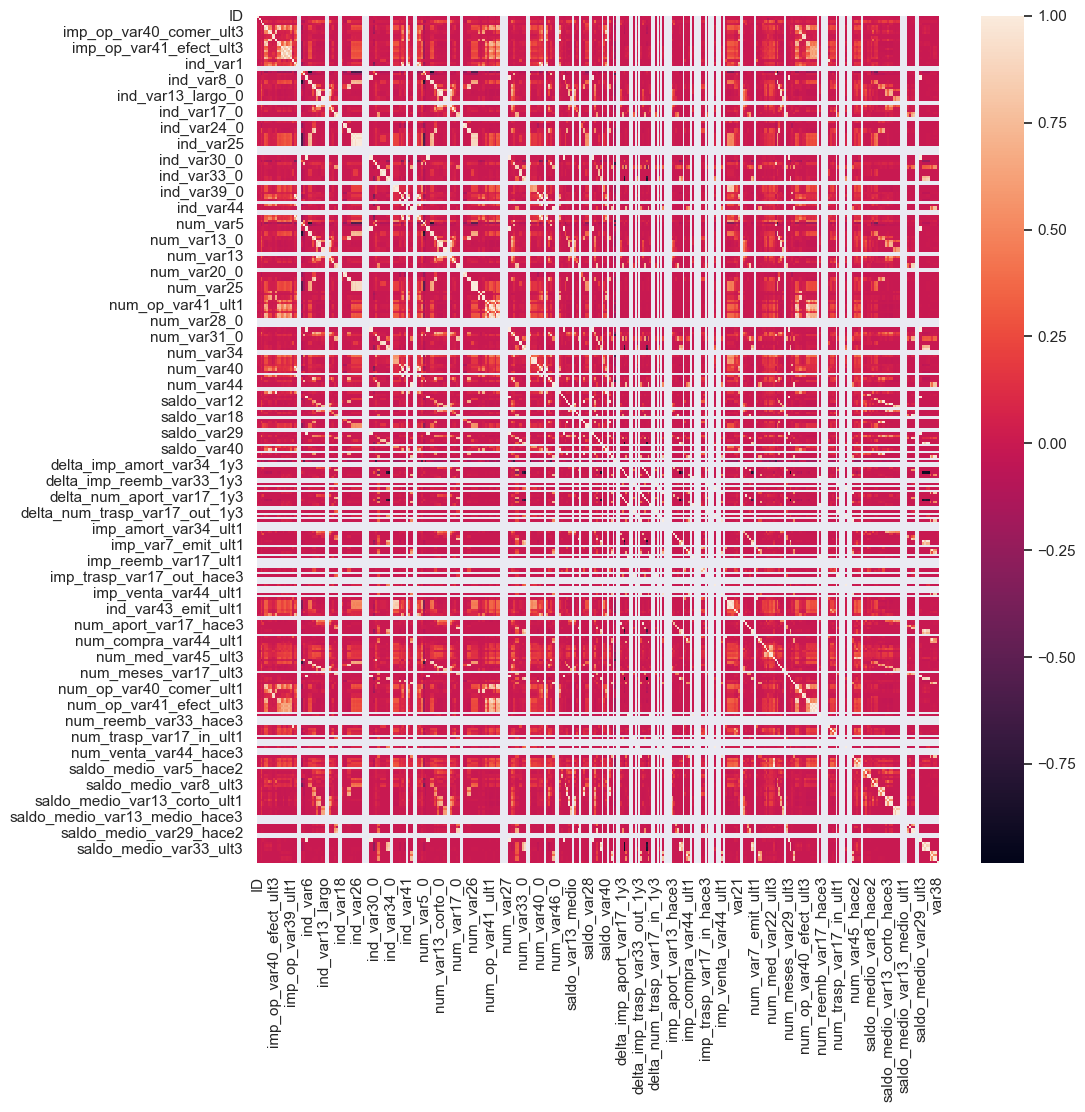

In [17]:
#Using Pearson Correlation

corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)
plt.show()

In [18]:
# Not so clear as there are 370 features so let's use the function we created with 90% correlation

corr_features = correlation(X_train, 0.9)

print(f"The number of most correlated features is {len(set(corr_features))} and their names are:\n {corr_features}")

The number of most correlated features is 156 and their names are:
 {'ind_var39', 'ind_var9_cte_ult1', 'num_meses_var12_ult3', 'num_var14', 'ind_var13_largo', 'delta_num_aport_var17_1y3', 'imp_op_var39_efect_ult3', 'num_var17', 'num_var24', 'num_op_var40_ult3', 'ind_var26', 'imp_trasp_var33_in_ult1', 'num_var31', 'saldo_var42', 'ind_var9_ult1', 'imp_trasp_var17_in_ult1', 'num_compra_var44_hace3', 'num_var44', 'num_trasp_var33_in_ult1', 'num_meses_var29_ult3', 'num_reemb_var13_ult1', 'num_var26', 'num_op_var41_comer_ult3', 'ind_var13_corto', 'saldo_medio_var13_largo_ult3', 'num_var1_0', 'saldo_medio_var29_ult1', 'num_op_var41_efect_ult3', 'imp_aport_var33_hace3', 'ind_var25_0', 'ind_var31', 'ind_var41_0', 'num_var13_largo', 'delta_num_compra_var44_1y3', 'saldo_medio_var13_corto_ult1', 'saldo_var33', 'num_meses_var8_ult3', 'num_op_var41_comer_ult1', 'num_op_var39_efect_ult3', 'num_var5_0', 'num_op_var40_efect_ult3', 'ind_var25', 'num_var37', 'imp_op_var39_ult1', 'num_var40_0', 'num_var14

In [19]:
# Now dropping the correlated features from the train and test dataset

X_train_trf = X_train.drop(corr_features, axis=1)
X_test_trf = X_test.drop(corr_features, axis=1)

X_train_trf

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var41_comer_ult1,...,saldo_medio_var13_medio_hace2,saldo_medio_var13_medio_hace3,saldo_medio_var13_medio_ult1,saldo_medio_var13_medio_ult3,saldo_medio_var17_hace2,saldo_medio_var17_hace3,saldo_medio_var29_hace2,saldo_medio_var29_hace3,saldo_medio_var44_hace2,var38
7681,15431,2,42,840.0,4477.02,4989.54,0.0,0.0,0,4477.02,...,0,0,0,0,0.0,0.0,0.0,0,0.0,37491.21
9031,18181,2,31,0.0,52.32,52.32,0.0,0.0,0,52.32,...,0,0,0,0,0.0,0.0,0.0,0,0.0,106685.94
3691,7411,2,51,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,66144.66
202,407,2,36,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,92121.36
5625,11280,2,23,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,74650.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,18564,2,33,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,117547.89
4859,9723,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,71050.83
3264,6557,2,24,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,141069.33
9845,19796,2,38,0.0,0.00,0.00,0.0,0.0,0,0.00,...,0,0,0,0,0.0,0.0,0.0,0,0.0,86412.15


In [20]:
# Checking the original dataset's shape with the transformed part

X_train.shape, X_train_trf.shape

((7000, 370), (7000, 214))